In [16]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
from globals import activity_dict_plain

In [17]:
%matplotlib inline

In [29]:
print(plt.style.available)
plt.style.use('classic')

['seaborn-muted', 'seaborn-dark-palette', 'seaborn-dark', '_classic_test', 'ggplot', 'bmh', 'dark_background', 'seaborn-ticks', 'seaborn-colorblind', 'classic', 'seaborn-talk', 'seaborn-notebook', 'fivethirtyeight', 'seaborn-paper', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-poster', 'seaborn', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-pastel', 'grayscale', 'seaborn-white']


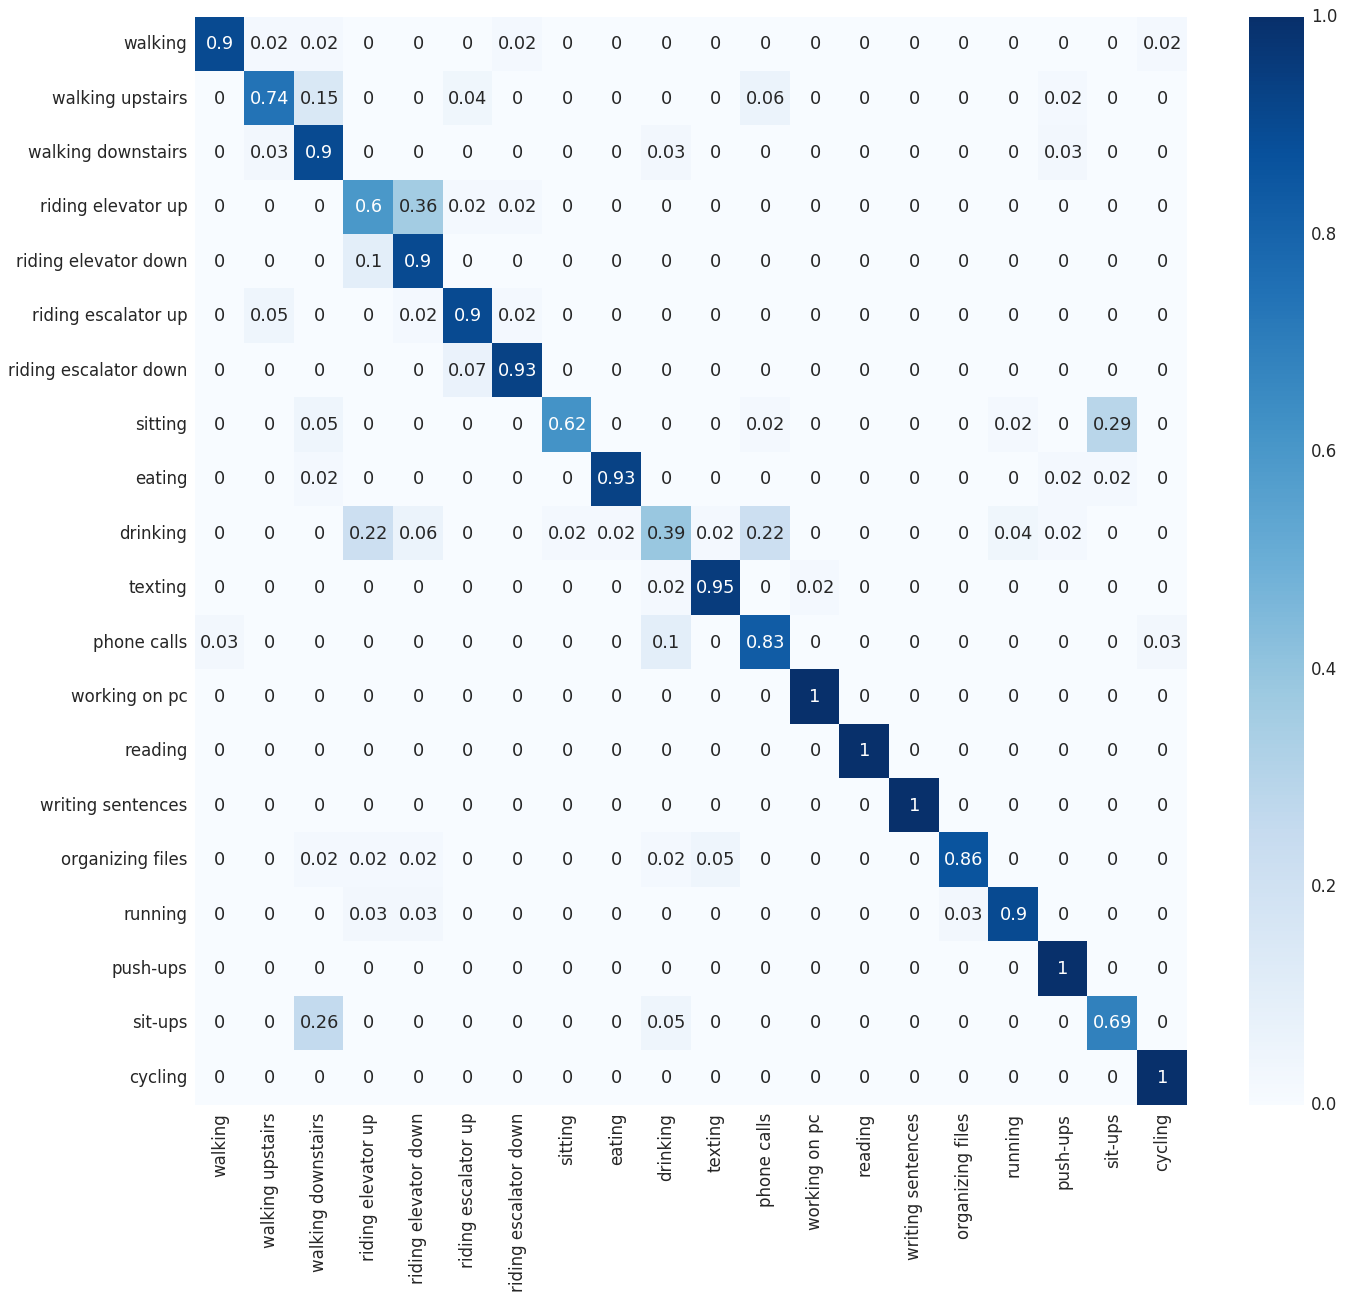

In [42]:
sns.set(font_scale=1.5)
hm = sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})

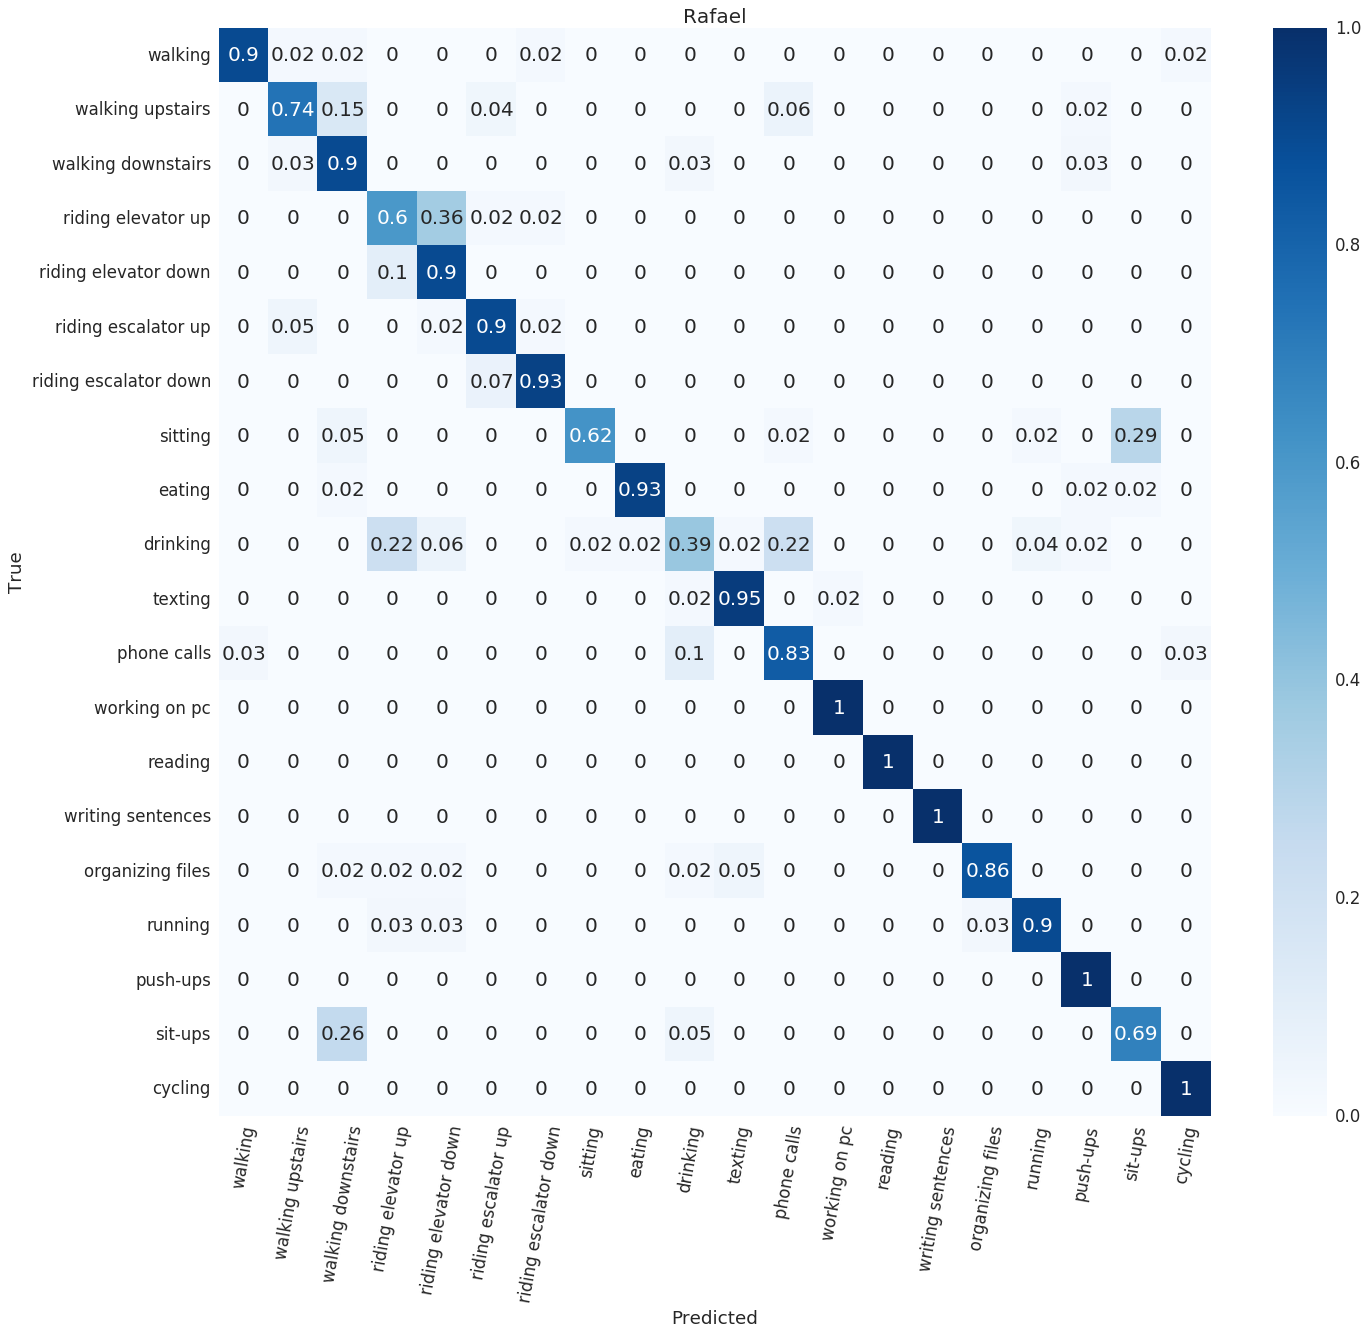

In [46]:
np_array = np.load("models/production/policies/83.71_0.05_0.95_policy_alpha_04.pb.npy")
sns.set(font_scale=1.5)
y_true = np_array[:, 2].astype(int)
y_pred = np_array[:, 0].astype(int)
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=activity_dict_plain(), columns=activity_dict_plain()).round(2)
hm = sns.heatmap(df_cm, annot=True,cmap="Blues")
hm.axes.set_title("Rafael")
hm.axes.set_xlabel("Predicted")
hm.axes.set_ylabel("True")
hm.set_xticklabels(hm.get_xticklabels(), rotation=80)

In [5]:
dataset = h5py.File('0_stats_2017_10_25_02_17.hdf5')

In [7]:
steps = dataset['action_avg'][:]

# Number of steps for each agent

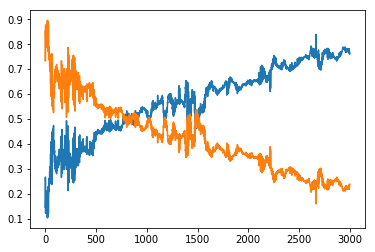

In [8]:
plt.plot(steps[:,0])
plt.plot(steps[:,1])

# Moving Averages

In [9]:
moving_avg = dataset['moving_average'][:]

## Rewards

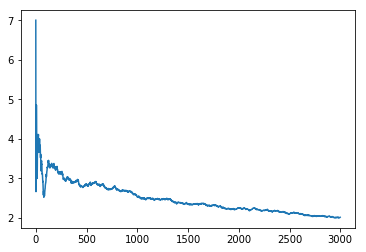

In [10]:
plt.plot(moving_avg[:,0])

## Accuracy

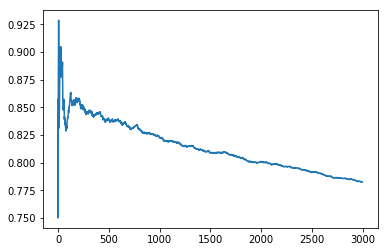

In [11]:
plt.plot(moving_avg[:,1])

# Rewards During Training

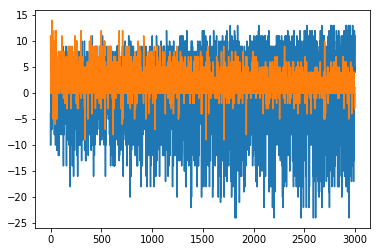

In [13]:
plt.plot(dataset['rewards'][:])

# Accuracy during training

In [14]:
ep_acc = dataset['batch_acc']

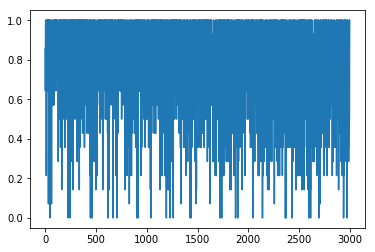

In [15]:
plt.plot(ep_acc)

In [23]:
true_preds = dataset['true_preds'][:]